## Diffusion from displacement of particles
In this part of the lab we are going to calculate the self-diffusion of water from data of the positions over time. In the program, a textfile called _msd.txt_ is generated after a simulation has been run, containing the mean squared displacement of water as a function of time. The mean squared displacement of water is calculated by summing the squares of the oxygen displacements from their respective reference positions determined by their start positions, $x_{0,n}$, at predefined points in time. Then, for each sampled point in time, the sum is divided by the total number of water molecules,
$$
\begin{align}
\langle(x(t)-x(t=0))^2\rangle = \frac{1}{N}\sum\limits_{n=1}^N (x_n(t)-x_n(t=0))^2
\label{msd}
\tag{1}
\end{align}
$$
where $N$ is the total number of particles. 

If particles interact, they will establish a random walk behaovior after enough "collisions" have ocuured, causing the mean squared displacement to increase lineary with time. However, in the start of a simulation, it is common that one observes a non-linear dependence of the mean squared displacement on time. This is known as the _ballistic_ regime, taking place because not enough collisions have occured to establish the random walk behavior. Mathematically, this can be shown by considering two different cases,


$$
\begin{equation}
x_1(t+\Delta t) = x(t) \pm \delta
\label{diff1}
\tag{2}
\end{equation}
$$   

$$
\begin{equation}
x_2(t+\Delta t) = x(t) + \delta
\label{diff2}
\tag{3}
\end{equation}
$$   
where equation \ref{diff1} describes random walk motion, with equal probabilities to move particles in the positive and negative direction, whereas equation \ref{diff2} describes ballistic motion, only displacing particles in the positive direction. The displacement parameter, $\delta$, is assumed to keep constant over time.

2. Run simulations with 216 water molecules for a series of temperatures (4-5 different, you choose which) and determine the diffusion coefficient of water for each temperature using the generated textfile _msd.txt_. Plot the mean squared displacements for all temperatures in the same plot, calculate the corresponding diffusion coefficients and report the values in a table. 

*Hints*:

i) The diffusion coeficient can be obtained using the relation,
$$
\begin{equation}
D = \frac{\langle(x(t)-x_0)^2\rangle}{2 Nt}
\tag{4}
\end{equation}
$$

ii) The curve for mean squared displacement as a function of time is often not linear. To obtain a reasonable value of the diffusion coefficient, one most commonly makes a linear regression of the part of the curve that shows nearly linear behavior. This is done below using the package stats of scipy:

```python
slope, intercept, r_value, p_value, std_err = stats.linregress(time_array,msd_array)
```

In [1]:
# Loading packages
import matplotlib.pyplot as plt
import numpy as np
import shutil
import os
from scipy import stats
from tempfile import mkstemp
from os import fdopen, remove
# Importing modules for loading and viewing
import mdtraj as md
import nglview as ngl

_ColormakerRegistry()

In [2]:
# Naming directories to be used
datadir = 'data/'
!pwd

/home/kemm38/Molecular_dynamics/Group_1/MD_lab


In [3]:
# Defining function to replace the value of input parameters in the input file 'config.mo' 
def replace(file_path, pattern, subst):
    with open(file_path,"r+") as f:
        new_f = f.readlines()
        f.seek(0)
        for line in new_f:
            if pattern not in line:
                f.write(line)
            else:
                f.write(subst+"\n")
        f.truncate()

In [4]:
Ts = [ ] # ENTER CODE HERE: Enter the temperatures you want to simulate, separated by a comma
iterations =  # multiply this with the timestep (0.001 ps) and you get the simulation time in ps. Use iterations 5000 <= x <= 50000 

replace('config.mo', 'iter', 'iter '+str(iterations))
replace('config.mo', 'simple', 'simple '+str(0))
replace('config.mo', 'timestep',    'timestep '    + str(0.001))

for T in Ts:
    print(T)
    replace('config.mo', 'temperature', 'temperature '+str(T))
    !./src/main WAT_216.equil.gro WAT_216.par config.mo
    os.rename('msd.txt', 'msd_T_'+str(T)+'.txt')
    shutil.move("msd_T_"+str(T)+".txt", datadir+"msd_T_"+str(T)+".txt")

150

Running in level 3 debug mode.
Vectorization is enabled
OpenMP is enabled
./../../../Software/mdTemp/build/main WAT_216.equil.gro 4
Reading config file:
Keyword: iter, value: 5000.000000
Keyword: temperature, value: 150.000000
Keyword: nof, value: 1000.000000
Keyword: outfreq, value: 100.000000
Keyword: timestep, value: 0.001000
Keyword: dof, value: 3.000000
Keyword: out, value: output.gro
Keyword: simple, value: 0.000000


Read cuboid box dimensions, 1.868930, 1.855290, 1.859630 from file.
Read 648 atoms, 216 molecules.
Done reading frame
Reading parameter file
Reading bonds
Reading angles


Running simulation
Initial temp: 0.000000 
Progress: 99.9% Temp: 149.5 Avg. temp: 150.7  Pot Energy: -12049.99557 Kin Energy: 1208.427, Speed: 656.9 ps / h
Simulation took: 27.639748 seconds.
Done
200

Running in level 3 debug mode.
Vectorization is enabled
OpenMP is enabled
./../../../Software/mdTemp/build/main WAT_216.equil.gro 4
Reading config file:
Keyword: iter, value: 5000.000000
Keywor

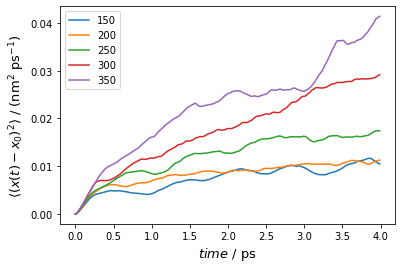

In [5]:
for T in Ts: # Looping over temperatures
    time = np.loadtxt(datadir+"msd_T_"+str(T)+".txt", usecols=0) # Loading time array for temperature T
    msd = np.loadtxt(datadir+"msd_T_"+str(T)+".txt", usecols=1) # Loading mean squared displacement for each time, averaged over all oxygens, for temperature T

    ### Plot the msd vs time
    plt.plot() # ENTER CODE HERE: enter arguments to plot and add labels with label="arbitraryLabelName"
plt.xlabel('$time$ / ps', fontsize=13) # Assigning x-axis label
plt.ylabel(r'$\langle(x(t)-x_0)^2\rangle$ / (nm$^2$ ps$^{-1})$', fontsize=13) # Assigning y-axis label
plt.legend() # Plotting legend
plt.savefig(datadir+"msd_vs_time.pdf") # Saving figure as pdf in subdirectory "data"

3. Plot the diffusion coefficient as a function of temperature in units cm$^2$/s and K, respectively. Discuss what you observe. Why does diffusion increase with temperature? Use keywords like entropy/thermal energy, enthalpy and local minima.  

Text(0, 0.5, '$D$ / (cm$^2$ s$^{-1}$)')

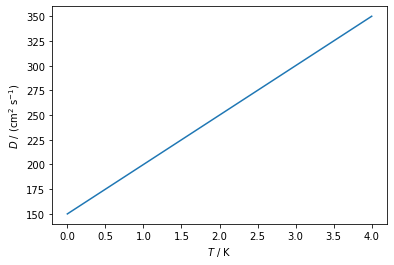

In [7]:
# Plotting diffusion vs temperature
i = 0 # Initializing counter
D = np.zeros([len(Ts)]) # Initializing Diffusion vector
N =    # ENTER CODE HERE: Number of dimensions (to be used in the Einstein relation)

for T in Ts: # Looping over temperatures
    time = np.loadtxt(datadir+"msd_T_"+str(T)+".txt", usecols=0) # Loading time array for temperature T
    msd = np.loadtxt(datadir+"msd_T_"+str(T)+".txt", usecols=1) # Loading mean squared displacement for each time, averaged over all oxygens, for temperature T
    slope, intercept, r_value, p_value, std_err = stats.linregress(time,msd)
    #print(msd)
    D[i] =     # ENTER CODE HERE: enter the expression for diffusion according to eq. 4, using the slope calculated. You will need a conversion factor to convert the slope in nm^2/ps to cm^2/s. 
    print("D(T="+str(T)+" K) = ", D[i])
    i = i+1 # Increasing counter by one
plt.plot()      # ENTER CODE HERE: Enter arguments (temperature and diffusion)
plt.xlabel('$T$ / K')
plt.ylabel('$D$ / (cm$^2$ s$^{-1}$)')

In [8]:
# Visualize
# Modifying gro files to be compatible with nglview (takes some time: a couple of minutes...)
for t in np.arange(0,10,1):
    replace('output.gro', 'Generated by Slaymulator, t='+str(t), 'Generated by Slaymulator, t= '+str(t)+'.0')

In [9]:
# Loading trajectory
waterTraj = md.load("output.gro")

In [10]:
# Loading trajectory for viewing
viewTraj = ngl.show_mdtraj(waterTraj)

In [11]:
viewTraj

NGLWidget(max_frame=999)

## Numerical Errors in MD Simulations:
A computer can normally only handle 15 significant numbers. This results in a small error each time a 
calculation is performed. To get more insight into this phenomenon and it's implications we take advantage 
of the deterministic nature of MD. 

In this part you will run a short simulation, approx 5ps, of 12 ions initially placed in the xy-plane, using a structure file called "2d.gro". You should then use the last frame of this simulation to run another simulation but this time backwards, with the same number of steps as the first. Since MD is deterministic you should end up at exactly the same configuration as the one you started with. It is important that you choose the same number of steps in both simulations to be able to get a clear picture of the error and the error propagation.

Since the ions will only move in two dimensions you are able to plot the positions of one particle in a graph. 

Run forward simulation:

In [12]:
iterations = 170000 # multiply this with the timestep (0.001 ps) and you get the simulation time in ps

# Modifying config.mo to contain what we want
replace('config.mo', 'iter',        'iter '        + str(iterations))
replace('config.mo', 'temperature', 'temperature ' + str(300))
replace('config.mo', 'timestep',    'timestep '    + str(0.001))
replace('config.mo', 'simple',        'simple '    + str(1))

# Running
!./src/main 2D_NaCl.gro 2D_NaCl.par config.mo

# Renaming output files
!mv output.gro forward.gro 
!mv track.txt track_forw.txt


Running in level 3 debug mode.
Vectorization is enabled
OpenMP is enabled
./../../../Software/md/build/main 2Dparticles.gro 4
Reading config file:
Keyword: iter, value: 170000.000000
Keyword: temperature, value: 300.000000
Keyword: nof, value: 1000.000000
Keyword: outfreq, value: 100.000000
Keyword: timestep, value: 0.001000
Keyword: dof, value: 3.000000
Keyword: out, value: output.gro
Keyword: simple, value: 1.000000


Read cuboid box dimensions, 6.000000, 6.000000, 6.000000 from file.
Read 12 atoms, 12 molecules.
Done reading frame
Reading parameter file
Reading bonds
Reading angles


Running simulation
Initial temp: 0.000000 
Progress: 99.9% Temp: 0.9 Avg. temp: 1.2  Pot Energy: 0.00006 Kin Energy: 0.131, Speed: 927504.5 ps / h
Simulation took: 0.790070 seconds.
Done


Run backward simulation:

In [13]:
replace('config.mo', 'timestep',    'timestep '    + str(-0.001)) # Editing timestep in config.mo to run backwards 

!tail -n 15 forward.gro | tee forwardLastFrame.gro # Copying last frame from forward.gro to forwardLastFrame.gro

# Running
!./src/main forwardLastFrame.gro 2D_NaCl.par config.mo

# Renaming output files
!mv output.gro backward.gro 
!mv track.txt track_back.txt

Generated by Slaymulator, t=999
12
    0ion     Na    1   1.323   1.588   0.000  0.0575 -0.0054  0.0000
    1ion     Cl    2   5.160   5.183   0.000 -0.0406 -0.0113  0.0000
    2ion     Na    3   0.004   4.779   0.000 -0.0333  0.0179  0.0000
    3ion     Cl    4   0.955   2.540   0.000 -0.0106 -0.0065  0.0000
    4ion     Cl    5   1.500   4.746   0.000  0.0000  0.0283  0.0000
    5ion     Na    6   1.500   5.813   0.000 -0.0000  0.0155  0.0000
    6ion     Cl    7   1.500   2.812   0.000 -0.0000  0.0094  0.0000
    7ion     Na    8   1.500   3.446   0.000 -0.0000 -0.0428  0.0000
    8ion     Na    9   1.677   1.588   0.000 -0.0575 -0.0054  0.0000
    9ion     Cl   10   3.840   5.183   0.000  0.0406 -0.0113  0.0000
   10ion     Na   11   2.996   4.779   0.000  0.0333  0.0179  0.0000
   11ion     Cl   12   2.045   2.540   0.000  0.0106 -0.0065  0.0000
6.000000    6.000000     6.000000

Running in level 3 debug mode.
Vectorization is enabled
OpenMP is enabled
./../../../Software/md/build

[-2.       -2.000235 -2.000931 -2.00208  -2.003669 -2.005679 -2.00809
 -2.010876 -2.014013 -2.017473 -2.021228 -2.025252 -2.02952  -2.034006
 -2.038687 -2.043543 -2.048554 -2.053702 -2.058971 -2.064347 -2.069817
 -2.075371 -2.080997 -2.086687 -2.092434 -2.098229 -2.104069 -2.109946
 -2.115857 -2.121797 -2.127763 -2.133751 -2.13976  -2.145786 -2.151828
 -2.157883 -2.16395  -2.170028 -2.176116 -2.182212 -2.188315 -2.194424
 -2.200539 -2.20666  -2.212785 -2.218914 -2.225046 -2.231182 -2.23732
 -2.243461 -2.249605 -2.25575  -2.261897 -2.268046 -2.274196 -2.280347
 -2.286499 -2.292653 -2.298807 -2.304963 -2.311118 -2.317275 -2.323432
 -2.32959  -2.335748 -2.341907 -2.348066 -2.354225 -2.360385 -2.366545
 -2.372705 -2.378865 -2.385026 -2.391187 -2.397348 -2.403509 -2.40967
 -2.415831 -2.421993 -2.428155 -2.434316 -2.440478 -2.44664  -2.452802
 -2.458964 -2.465126 -2.471288 -2.47745  -2.483612 -2.489774 -2.495937
 -2.502099 -2.508261 -2.514423 -2.520586 -2.526748 -2.532911 -2.539073
 -2.54523

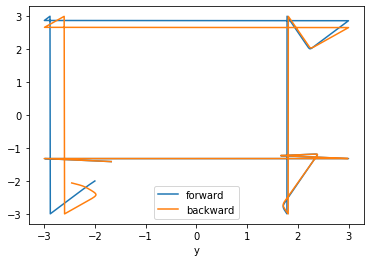

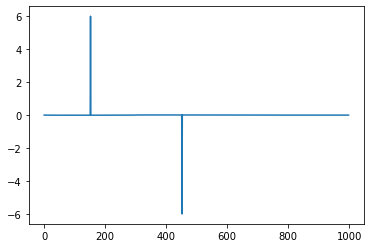

In [14]:
# Loading track files
forward = np.loadtxt('track_forw.txt', unpack=True)
backward = np.loadtxt('track_back.txt', unpack=True)

fx = forward[1][1:] - forward[1][:-1]
fy = forward[2][1:] - forward[2][:-1]
gx = backward[1][1:] - backward[1][:-1]
gy = backward[2][1:] - backward[2][:-1]

# Plotting forward and backward trajectory
plt.figure()
plt.plot(forward[1], forward[2], label='forward')
plt.plot(backward[1], backward[2], label='backward')
plt.xlabel("x")
plt.xlabel("y")
plt.legend()

# Plotting forward and backward trajectory
#print(fx)
print(forward[1][:-1])
plt.figure()
plt.plot(fy)

1. Plot the positions of one particle from both simulations in the same graph. 

2. Compare the structure of the first frame in the first simulation and the last frame in the second simulation. 

3. Shortly discuss the results you have found.

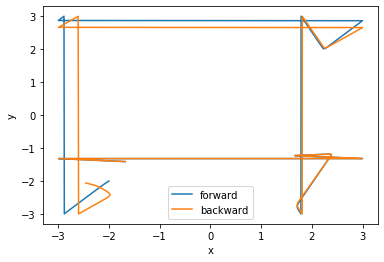

In [15]:
plt.plot(forward[1], forward[2], label='forward')
plt.plot(backward[1], backward[2], label='backward')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

## Plot

In [16]:
# Modifying gro files to be compatible with nglview
for t in np.arange(0,1000,1):
    replace('backward.gro', 'Generated by Slaymulator, t='+str(t), 'Generated by Slaymulator, t= '+str(t)+'.0')
    replace('forward.gro', 'Generated by Slaymulator, t='+str(t), 'Generated by Slaymulator, t= '+str(t)+'.0')

In [17]:
forwardTraj = md.load("forward.gro")
backwardTraj = md.load("backward.gro")

In [18]:
# Loading files for viewing
viewForward = ngl.show_mdtraj(forwardTraj)
viewBackward = ngl.show_mdtraj(backwardTraj)

In [19]:
# Viewing forward trajectory
viewForward

NGLWidget(max_frame=999)

In [20]:
# Viewing backward trajectory
viewBackward

NGLWidget(max_frame=999)